In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train], axis=0)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### Select columns

In [4]:
df = df[['title', 'label']]
df.head(5)

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


## EDA

#### Basic info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [6]:
df.describe()

,label
count,20800.000000
mean,0.500625
std,0.500012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


1    10413
0    10387
Name: label, dtype: int64
1    0.500625
0    0.499375
Name: label, dtype: float64


Text(0.5, 1.0, 'Label Counts')

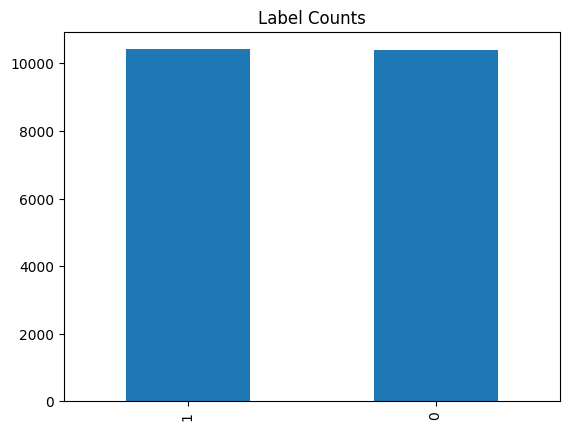

In [7]:
# as numbers
print (df['label'].value_counts())
# as percentage
print (df['label'].value_counts(normalize=True))
# plot 
df['label'].value_counts().plot(kind='bar').set_title('Label Counts')

#### Check for NaNs in the data

In [8]:
df.isna().sum()

title    558
label      0
dtype: int64

#### Some rows contain "Print \n" in the title column. Count and these rows.

In [9]:
(df['title'].str.contains('Print \n')).value_counts(dropna=False)

False    20242
NaN        558
Name: title, dtype: int64

## Data preparation

In [18]:
# remove rows with no label
df = df[~df['label'].isna()]
# remove rows with no text
df = df[~df['title'].isna()]

In [19]:
# remove rows with 'Print \n' in text
df = df[~df['title'].str.contains('Print \n')]

In [20]:
# rename label to is_clickbait
df.rename(columns={'label': 'is_clickbait'}, inplace=True)

In [21]:
# convert is clickbait to int
df['is_clickbait'] = df['is_clickbait'].astype(int)

In [22]:
df.head(5)

,title,is_clickbait
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [23]:
# export to csv
df[['title', 'is_clickbait']].to_csv('labeled.csv', index=False)